# 1. SMAs strategy

In [217]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib as plt
import yahoo_fin.stock_info as si
from yahoo_fin import options
from datetime import date
from pylab import mpl, plt
from scipy.optimize import brute

In [218]:
import datetime 

today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)
twelve_years_ago = today - datetime.timedelta(days = 3000)


In [219]:
#Select the ticker
# Brent Crude:              BZ=F                    # EURUSD:               EURUSD=X
# Henry Hub_front year:     NG=F                    # GBPUSD:               GBPUSD=X
# TTF_front year:           TTF=F                
# Carbon EUA:
# Plug Power:                PLUG                   # Fuelcell Energy         FCEL
# Cummins Inc.               CMI 
# Ballard Power Systems Inc. BLDP
# Gold                      GC=F
# Gold Miners ETF           GDX

symbol = 'BZ=F' 

In [220]:
# Select time of analysis

start = twelve_years_ago
end = yesterday

start_cutoff = 2018-1-1
end_cutoff = 2017-12-31

In [221]:
# Run SMAVectorBacktester in order to get the best SMAs = (return , outperformance)

import SMAVectorBacktester as SMA
smabt = SMA.SMAVectorBacktester(symbol, 42, 252, start , end)
smabt.run_strategy() # Backtests the SMA-based strategy given the parameters during instantiation.

(1.04, -0.91)

In [222]:
#The optimize_parameters() method takes as input parameter ranges with step sizes and determines the optimal combination by a brute force approach.


In [223]:
%%time 
Mov_avg = smabt.optimize_parameters((20, 50, 2),(200, 300, 2))
Mov_avg

Wall time: 2.42 s


(array([ 22., 212.]), 3.89)

In [224]:
fast = int(Mov_avg[0][0])
fast

22

In [225]:
slow = int(Mov_avg[0][1])
slow

212

In [226]:
#retrieve data from Yahoo finance

ticker = si.get_data(symbol,start_date=twelve_years_ago,end_date=yesterday, interval = "1d") 

In [227]:
ticker
#ticker.info()

,open,high,low,close,adjclose,volume,ticker
2015-01-02,57.630001,58.220001,55.520000,56.419998,56.419998,16707.0,BZ=F
2015-01-05,56.290001,56.290001,52.669998,53.110001,53.110001,30065.0,BZ=F
2015-01-06,53.230000,53.520000,50.529999,51.099998,51.099998,35494.0,BZ=F
2015-01-07,51.060001,51.840000,49.680000,51.150002,51.150002,37082.0,BZ=F
2015-01-08,51.000000,51.889999,49.820000,50.959999,50.959999,29469.0,BZ=F
...,...,...,...,...,...,...,...
2023-03-13,82.540001,83.470001,78.339996,80.769997,80.769997,38195.0,BZ=F
2023-03-14,80.690002,80.879997,76.879997,77.449997,77.449997,33198.0,BZ=F
2023-03-15,77.570000,78.709999,71.629997,73.690002,73.690002,46598.0,BZ=F
2023-03-16,74.349998,75.519997,71.860001,74.699997,74.699997,29873.0,BZ=F


In [228]:
# Calculates the log returns.
ticker['close_returns'] = np.log(ticker['close'] / ticker['close'].shift(1)).apply(np.exp)
ticker.describe()

,open,high,low,close,adjclose,volume,close_returns
count,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2049.000000
mean,63.343172,64.354966,62.309180,63.352274,63.352274,29025.375849,1.000617
std,18.803872,19.155314,18.457654,18.834383,18.834383,12682.320088,0.027147
min,19.559999,21.270000,16.000000,19.330000,19.330000,0.000000,0.755964
25%,49.599998,50.322500,48.707500,49.567501,49.567501,21785.000000,0.989093
50%,61.779999,62.639999,60.830000,61.879999,61.879999,28668.000000,1.000902
75%,73.697500,74.570000,72.635000,73.615002,73.615002,36053.250000,1.012797
max,129.570007,137.000000,122.500000,127.980003,127.980003,87185.000000,1.315466


In [229]:
ticker

,open,high,low,close,adjclose,volume,ticker,close_returns
2015-01-02,57.630001,58.220001,55.520000,56.419998,56.419998,16707.0,BZ=F,NaN
2015-01-05,56.290001,56.290001,52.669998,53.110001,53.110001,30065.0,BZ=F,0.941333
2015-01-06,53.230000,53.520000,50.529999,51.099998,51.099998,35494.0,BZ=F,0.962154
2015-01-07,51.060001,51.840000,49.680000,51.150002,51.150002,37082.0,BZ=F,1.000979
2015-01-08,51.000000,51.889999,49.820000,50.959999,50.959999,29469.0,BZ=F,0.996285
...,...,...,...,...,...,...,...,...
2023-03-13,82.540001,83.470001,78.339996,80.769997,80.769997,38195.0,BZ=F,0.975719
2023-03-14,80.690002,80.879997,76.879997,77.449997,77.449997,33198.0,BZ=F,0.958896
2023-03-15,77.570000,78.709999,71.629997,73.690002,73.690002,46598.0,BZ=F,0.951453
2023-03-16,74.349998,75.519997,71.860001,74.699997,74.699997,29873.0,BZ=F,1.013706


In [230]:
#cleaning data with interpolation instead dropma

data = pd.DataFrame(ticker['close'])
data = data.interpolate() 

In [231]:
# Generate Fast & Slow Moving Averages

data['SMA1'] = np.round(data['close'].rolling(window = fast).mean(),2)
data['SMA2'] = np.round(data['close'].rolling(window = slow).mean(),2)

In [232]:
data.tail()

,close,SMA1,SMA2
2023-03-13,80.769997,83.82,94.51
2023-03-14,77.449997,83.50,94.36
2023-03-15,73.690002,82.93,94.18
2023-03-16,74.699997,82.38,94.00
2023-03-17,72.970001,81.81,93.81


<AxesSubplot:title={'center':'Stock/Commodity Close Price & SMAs'}>

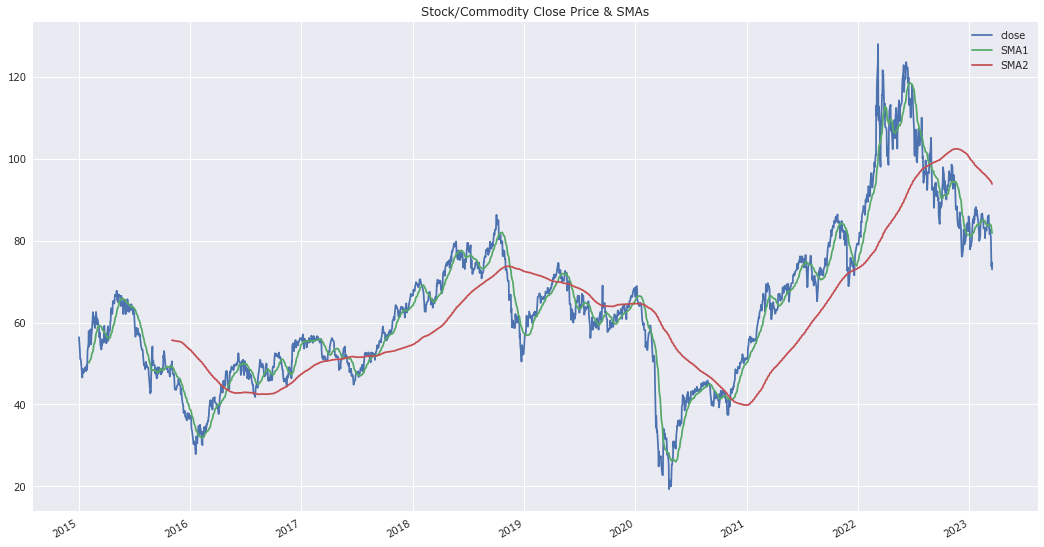

In [233]:
%matplotlib inline
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'Verdana'

data.plot(title='Stock/Commodity Close Price & SMAs', grid=True, figsize=(18,10))

In [234]:
# Vectorize condition: Implements the trading rule in vectorized fashion. np.where() produces +1 for rows where the expression is True and -1 for rows where the expression is False.

#data['SMA_position'] = np.where(data['SMA1'] < data['close'], 1, -1)
data['SMA_position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
#data['SMA_position_short'] = np.where(data['SMA1'] < data['close'], 1, -1)

count = 0
data['SMA_position_short'] = 1
for i in range(1, len(data)):
    if data['SMA1'].iloc[i] < data['close'].iloc[i] and data['SMA1'].iloc[i-1] < data['close'].iloc[i-1]:
        count = count +1
        if count >= 7:
            data['SMA_position_short'].iloc[i] = 1
        else:
            data['SMA_position_short'].iloc[i] = data['SMA_position_short'].iloc[i-1]
    elif data['SMA1'].iloc[i] > data['close'].iloc[i] and data['SMA1'].iloc[i-1] > data['close'].iloc[i-1]:
        count = count +1
        if count >= 7:
            data['SMA_position_short'].iloc[i] = -1
        else:
            data['SMA_position_short'].iloc[i] = data['SMA_position_short'].iloc[i-1]
    else:
        count = 1
        data['SMA_position_short'].iloc[i] = data['SMA_position_short'].iloc[i-1]

#for i in range(len(data)):
    #if data['SMA1'].iloc[i] > data['SMA2'].iloc[i] and data['SMA1'].iloc[i] < data['close'].iloc[i]:
        #data['SMA_position'][i] = 20
    #elif data['SMA1'].iloc[i] < data['SMA2'].iloc[i] and data['SMA1'].iloc[i] > data['close'].iloc[i]:
        #data['SMA_position'][i] = -20
    #elif data['SMA1'].iloc[i] > data['SMA2'].iloc[i] and data['SMA1'].iloc[i] > data['close'].iloc[i]:
        #data['SMA_position'][i] = 10
    #elif data['SMA1'].iloc[i] < data['SMA2'].iloc[i] and data['SMA1'].iloc[i] < data['close'].iloc[i]:
        #data['SMA_position'][i] = -10

buy = list()
sell = list()
buy_weak = list()
sell_weak = list()

for i in range(len(data)):
    if data['SMA1'].iloc[i] > data['SMA2'].iloc[i] and data['SMA1'].iloc[i-1] < data['SMA2'].iloc[i-1]:
        buy.append(i)
    elif data['SMA1'].iloc[i] < data['SMA2'].iloc[i] and data['SMA1'].iloc[i-1] > data['SMA2'].iloc[i-1]:
        sell.append(i)
    elif data['SMA1'].iloc[i] < data['close'].iloc[i] and data['SMA1'].iloc[i-1] > data['close'].iloc[i-1]:
        buy_weak.append(i)
    elif data['SMA1'].iloc[i] > data['close'].iloc[i] and data['SMA1'].iloc[i-1] < data['close'].iloc[i-1]:
        sell_weak.append(i)

C:\Users\FB9CE~1.CAM\AppData\Local\Temp/ipykernel_10456/2906092591.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_position_short'].iloc[i] = data['SMA_position_short'].iloc[i-1]
C:\Users\FB9CE~1.CAM\AppData\Local\Temp/ipykernel_10456/2906092591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_position_short'].iloc[i] = data['SMA_position_short'].iloc[i-1]
C:\Users\FB9CE~1.CAM\AppData\Local\Temp/ipykernel_10456/2906092591.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

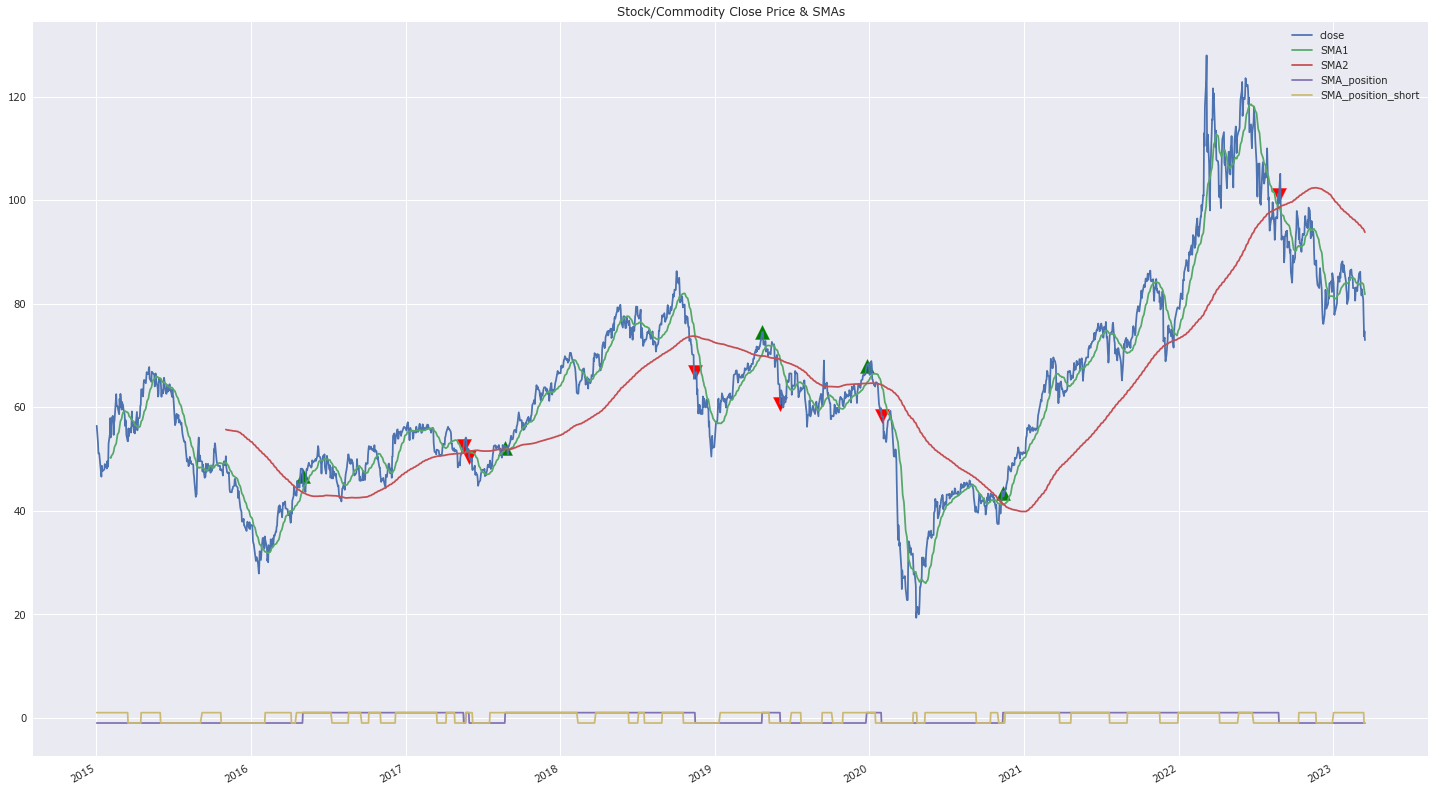

In [235]:
%matplotlib inline
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'Verdana'

data.plot(title='Stock/Commodity Close Price & SMAs', grid=True, figsize=(25,15))
plt.scatter(data.iloc[buy].index, data.iloc[buy]['close'], marker='^', color='g', s=200)
plt.scatter(data.iloc[sell].index, data.iloc[sell]['close'], marker='v', color='r', s=200)
#plt.scatter(data.iloc[buy_weak].index, data.iloc[buy_weak]['close'], marker='^', color='lime', s=100)
#plt.scatter(data.iloc[sell_weak].index, data.iloc[sell_weak]['close'], marker='v', color='brown', s=100)

In [236]:
print(data['SMA_position'])

2015-01-02   -1
2015-01-05   -1
2015-01-06   -1
2015-01-07   -1
2015-01-08   -1
             ..
2023-03-13   -1
2023-03-14   -1
2023-03-15   -1
2023-03-16   -1
2023-03-17   -1
Name: SMA_position, Length: 2074, dtype: int32


In [237]:

data.dropna(inplace=True) #	Deletes all rows of the data set that contain at least one NaN value.
data.head()

,close,SMA1,SMA2,SMA_position,SMA_position_short
2015-11-03,50.540001,49.37,55.70,-1,-1
2015-11-04,48.580002,49.34,55.66,-1,-1
2015-11-05,47.980000,49.16,55.64,-1,-1
2015-11-06,47.419998,48.99,55.62,-1,-1
2015-11-09,47.189999,48.72,55.60,-1,-1


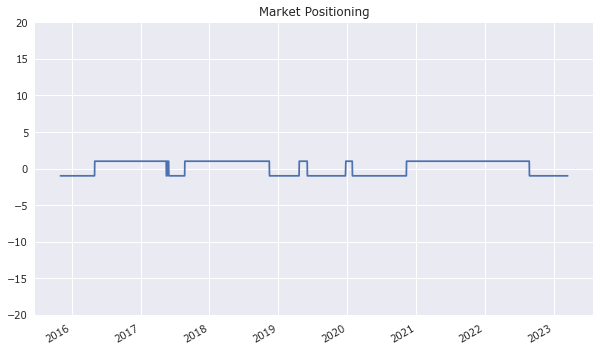

In [238]:
# Plot of the strategy: going long & short
data['SMA_position'].plot(ylim=[-20.1, 20.1],title='Market Positioning',figsize=(10, 6));

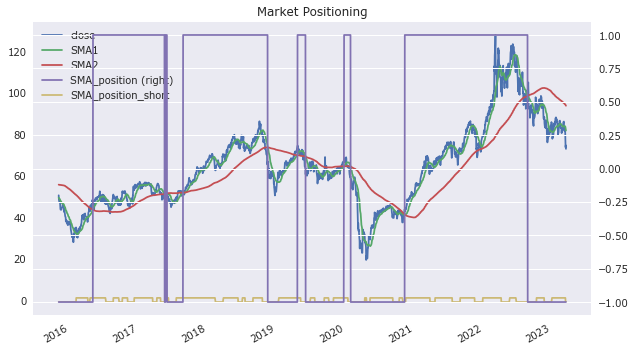

In [239]:
data.plot(title='Market Positioning', figsize=(10, 6), secondary_y = 'SMA_position');

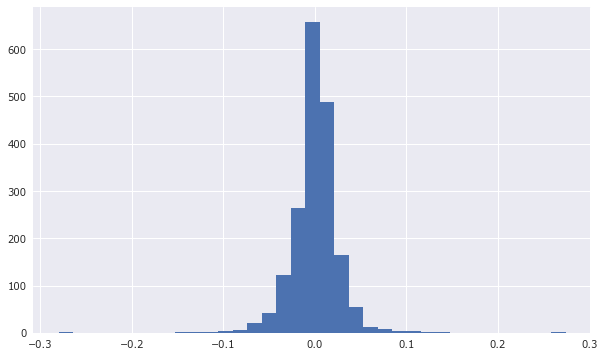

In [240]:
#Log returns
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data['returns'].hist(bins=35, figsize=(10, 6));

In [241]:
#Define the strategy and compare results
data['SMA_strategy'] = data['SMA_position'].shift(1) * data['returns'] #Derives the log returns of the strategy given the positionings and market returns.
data[['returns', 'SMA_strategy']].sum() #Sums up the single log return values for both the stock and the strategy (for illustration only).

returns         0.367283
SMA_strategy    1.181225
dtype: float64

In [242]:
data[['returns', 'SMA_strategy']].sum().apply(np.exp) #Applies the exponential function to the sum of the log returns to calculate the gross performance.

returns         1.443807
SMA_strategy    3.258365
dtype: float64

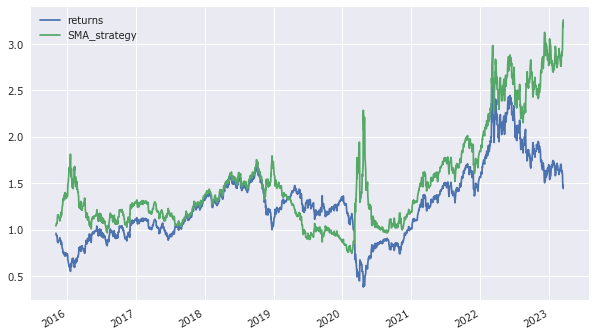

In [243]:
data[['returns', 'SMA_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

# SMAs Strategy 2

#### strategia che valuta i periodi in cui la media veloce è maggiore o minore del close per un certo numero di periodi. Nel caso la media sia > del prezzo per più di 7 periodi il segnale sarà di acquisto, nel caso duale ci sarà un segnale di vendita. Un possibile upgrade del modello prevede di lavorare su un backtest sulla lunghezza del periodo da considerare per avere un'efficienza migliore.

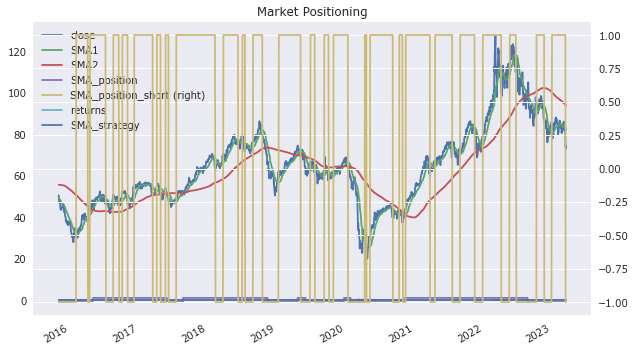

In [244]:
data.plot(title='Market Positioning', figsize=(10, 6), secondary_y = 'SMA_position_short');

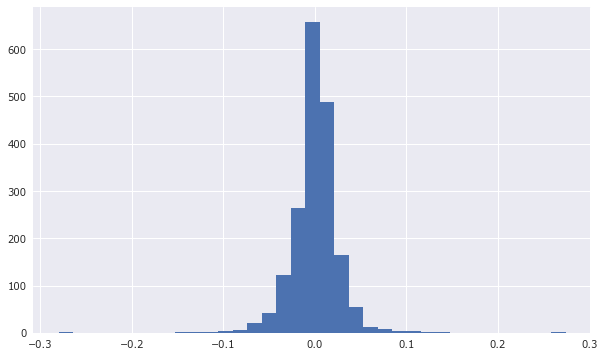

In [245]:
#Log returns
data['returns_s'] = np.log(data['close'] / data['close'].shift(1))
data['returns_s'].hist(bins=35, figsize=(10, 6));

In [246]:
#Il codice per rilevare l'efficienza del modello è uguale alla precedente strategia ma utilizza la colonna
#SMA_position_short creata precedentemente come descritto dall'algoritmo
data['SMA_strategy_short'] = data['SMA_position_short'].shift(1) * data['returns_s'] #Derives theurns of the strategy given the positionings and market returns.
data[['returns_s', 'SMA_strategy_short']].sum() #Sums up the single log return values for both the stock  log retand the strategy (for illustration only).


returns_s             0.367283
SMA_strategy_short    1.084648
dtype: float64

In [247]:
data[['returns_s', 'SMA_strategy_short']].sum().apply(np.exp) #Applies the exponential function to the sum of the log returns to calculate the gross performance.

returns_s             1.443807
SMA_strategy_short    2.958398
dtype: float64

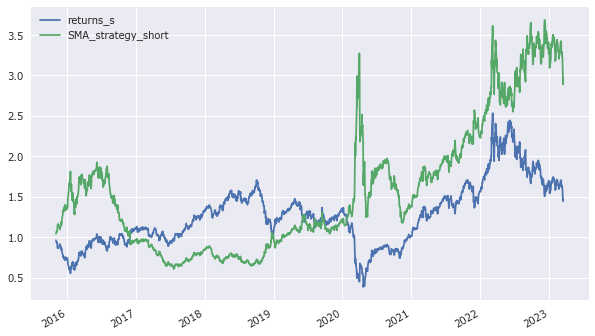

In [248]:
data[['returns_s', 'SMA_strategy_short']].sum().apply(np.exp) #Applies the exponential function to the sum of the log returns to calculate the gross performance.
data[['returns_s', 'SMA_strategy_short']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [249]:
# Calculates the annualized mean return — in both log and regular space.

data[['returns', 'SMA_strategy']].mean() * 252

returns         0.049708
SMA_strategy    0.159865
dtype: float64

In [250]:
#Calculates the annualized standard deviation — in both log and regular space.

data[['returns', 'SMA_strategy']].std() * 252 ** 0.5

returns         0.428503
SMA_strategy    0.428396
dtype: float64

In [251]:
#Defines a new column cumret with the gross performance over time.

data['cumret'] = data['SMA_strategy'].cumsum().apply(np.exp)

In [252]:
#Defines yet another column with the running maximum value of the gross performance.

data['cummax'] = data['cumret'].cummax()

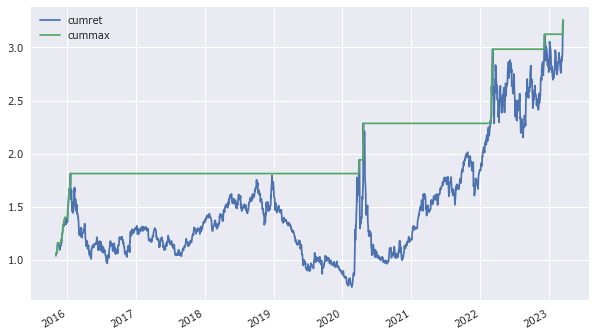

In [253]:
#plots the two new columns of the DataFrame object.

data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [254]:
#Calculates the element-wise difference between the two columns. 

drawdown = data['cummax'] - data['cumret']

In [255]:
#MAX drawdown (%)
drawdown.max()

1.3220137573229325

In [256]:
#Where are the differences equal to zero?

temp = drawdown[drawdown == 0]

In [257]:
#Calculates the timedelta values between all index values. 

periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [258]:
periods[12:20] # 1 in both the colums means a new MAX is reached

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelta(days=2),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelta(days=1)],
      dtype=object)

In [259]:
# Picks out the maximum timedelta value.

periods.max()

datetime.timedelta(days=1531)

# VWAP Strategy

#### Strategia che utilizza come benchmark il grafico della vwap che si ottiene come media ponderata del prezzo medio sul volume. In questo caso l 'algoritmo incrocia la vwap con il grafico del prezzo e stabilisce l'acquisto o la vendita se la vwap è minore o maggiore del prezzo di close. Anche questo algoritmo è facilmente migliorabile inserendo dei delay nell'entrata a mercato su un periodo calcolato tramite backtest.

In [260]:
ind = list()

for i in range(len(ticker)):
    if str(ticker['high'].values[i]) == 'nan':
        ind.append(i)
    if str(ticker['low'].values[i]) == 'nan':
        ind.append(i)
    if str(ticker['close'].values[i]) == 'nan':
        ind.append(i)
    if str(ticker['volume'].values[i]) == 'nan':
        ind.append(i)
        
ticker = ticker.drop(ticker.index[ind])

In [261]:
def vwap(ticker):
    v = ticker['volume'].values
    tp = (ticker['low'] + ticker['close'] + ticker['high']).div(3).values
    ticker['vwap'] = (tp * v).cumsum() / v.cumsum()
    return ticker

vwap(ticker)

,open,high,low,close,adjclose,volume,ticker,close_returns,vwap
2015-01-02,57.630001,58.220001,55.520000,56.419998,56.419998,16707.0,BZ=F,NaN,56.720000
2015-01-05,56.290001,56.290001,52.669998,53.110001,53.110001,30065.0,BZ=F,0.941333,54.986585
2015-01-06,53.230000,53.520000,50.529999,51.099998,51.099998,35494.0,BZ=F,0.962154,53.575765
2015-01-07,51.060001,51.840000,49.680000,51.150002,51.150002,37082.0,BZ=F,1.000979,52.741285
2015-01-08,51.000000,51.889999,49.820000,50.959999,50.959999,29469.0,BZ=F,0.996285,52.374690
...,...,...,...,...,...,...,...,...,...
2023-03-13,82.540001,83.470001,78.339996,80.769997,80.769997,38195.0,BZ=F,0.975719,62.448543
2023-03-14,80.690002,80.879997,76.879997,77.449997,77.449997,33198.0,BZ=F,0.958896,62.457409
2023-03-15,77.570000,78.709999,71.629997,73.690002,73.690002,46598.0,BZ=F,0.951453,62.466933
2023-03-16,74.349998,75.519997,71.860001,74.699997,74.699997,29873.0,BZ=F,1.013706,62.472706


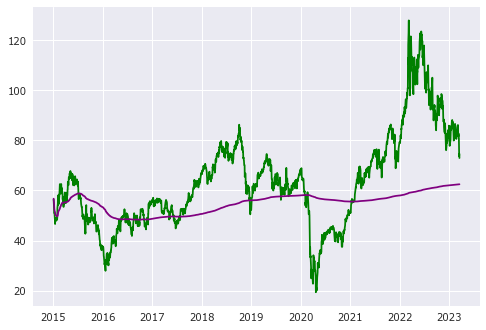

In [262]:
import matplotlib.pyplot as plt

plt.plot(ticker.index, ticker['close'].values, label='Close', color='green')
plt.plot(ticker.index, ticker['vwap'].values, label='vwap', color='purple')

In [263]:
dt = pd.DataFrame(ticker['close'])
dt = dt.interpolate()
dt
#dt['vwap_position'] = np.where(dt['close'] > dt['vwap'], 1, -1)

,close
2015-01-02,56.419998
2015-01-05,53.110001
2015-01-06,51.099998
2015-01-07,51.150002
2015-01-08,50.959999
...,...
2023-03-13,80.769997
2023-03-14,77.449997
2023-03-15,73.690002
2023-03-16,74.699997


In [264]:
dt['vwap'] = ticker['vwap']
dt['vwap_position'] = np.where(dt['close'] > dt['vwap'], -1, 1)
dt

,close,vwap,vwap_position
2015-01-02,56.419998,56.720000,1
2015-01-05,53.110001,54.986585,1
2015-01-06,51.099998,53.575765,1
2015-01-07,51.150002,52.741285,1
2015-01-08,50.959999,52.374690,1
...,...,...,...
2023-03-13,80.769997,62.448543,-1
2023-03-14,77.449997,62.457409,-1
2023-03-15,73.690002,62.466933,-1
2023-03-16,74.699997,62.472706,-1


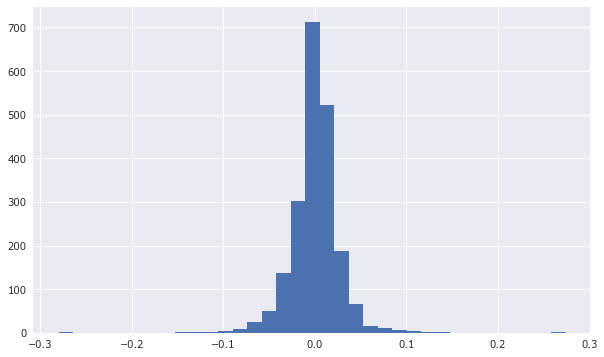

In [265]:
dt['returns'] = np.log(dt['close'] / dt['close'].shift(1))
dt['returns'].hist(bins=35, figsize=(10, 6));

In [268]:
dt['vwap_strategy'] = dt['vwap_position'].shift(1) * dt['returns']
dt[['returns', 'vwap_strategy']].sum()

returns          0.257225
vwap_strategy    0.779692
dtype: float64

In [269]:
dt[['returns', 'vwap_strategy']].sum().apply(np.exp)

returns          1.293336
vwap_strategy    2.180800
dtype: float64

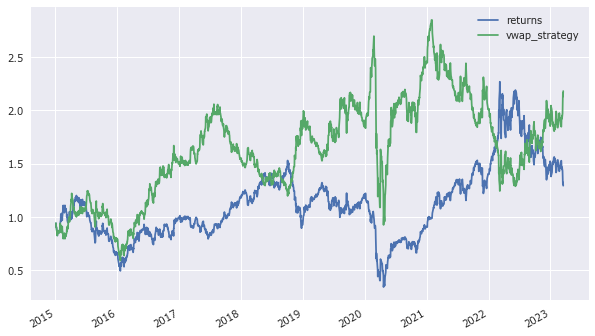

In [270]:
dt[['returns', 'vwap_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

# 2. SMA + SD strategy

In [37]:
data['SMAfast-SMAslow']=data['SMA1']-data['SMA2']
data['SMAfast-SMAslow'].tail()

2021-04-13    15.20
2021-04-14    15.08
2021-04-15    14.96
2021-04-16    14.85
2021-04-19    14.75
Name: SMAfast-SMAslow, dtype: float64

In [38]:
to_plot = ['returns']

for m in [5, 10, 15, 20, 25, 30]:
    data['SMA&SD_position_%d' % m]=np.where(data['SMAfast-SMAslow']>m,1,0)
    data['SMA&SD_position_%d' % m]=np.where(data['SMAfast-SMAslow']<-m,-1,data['SMA&SD_position_%d' % m])
    data['SMA&SD_position_%d' % m].value_counts()
    to_plot.append('SMA&SD_position_%d' % m) 

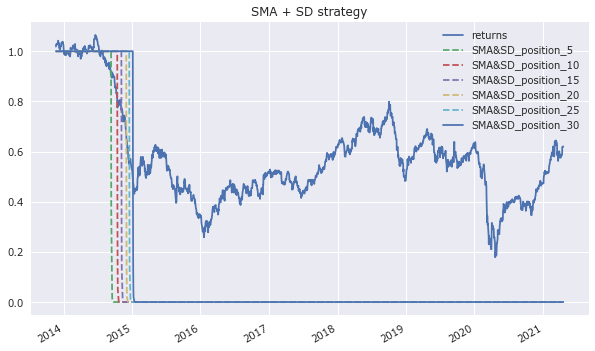

In [39]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='SMA + SD strategy',
    figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);

In [40]:
# data['SMA&SD_Strategy']=data['SMA&SD_position_4'].shift(1)*data['Returns']

In [41]:
# data[['Returns', 'SMA&SD_Strategy']].sum().apply(np.exp)

In [42]:
# data[['Returns', 'SMA&SD_Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8,5))

# 3. Turtle Strategy


#### The Turtle Trading system was coined by Richard Dennis and worked brilliantly for the traders in the 1980’s. But it turns out that the system requires some tweaking for it to reflect new market conditions and be effective now. That said, trends still happen which means there are a plethora of trading opportunities. The core of the turtle trading strategy is to take a position on futures on a 55-day breakout. A 55-day breakout is when the price exceeds high or low of past 55 days price. The full strategy is more complex, however in this article, I have coded the crux of the strategy in Python

In [43]:
window = 55                                                 # Defines the window, i.e. the number of index values to include.

In [44]:
data['min'] = data['close'].rolling(window=window).min()    # Calculates the rolling minimum value.

In [45]:
data['mean'] = data['close'].rolling(window=window).mean()  # Calculates the rolling mean value.

In [46]:
data['std'] = data['close'].rolling(window=window).std()    # Calculates the rolling standard deviation.

In [47]:
data['median'] = data['close'].rolling(window=window).median()  # Calculates the rolling median value.

In [48]:
data['max'] = data['close'].rolling(window=window).max()    # Calculates the rolling maximum value.

In [49]:
data['ewma'] = data['close'].ewm(halflife=0.5, min_periods=window).mean()  # This calculates the exponentially weighted moving average, with decay in terms of a half life of 0.5.

In [50]:
data[['min', 'mean', 'max', 'std','median', 'ewma' ]].dropna().head()

,min,mean,max,std,median,ewma
2014-02-10,105.779999,109.021363,112.620003,2.034126,108.669998,108.700157
2014-02-11,105.779999,109.032636,112.620003,2.030414,108.680000,108.685040
2014-02-12,105.779999,109.009182,112.620003,2.025536,108.680000,108.763761
2014-02-13,105.779999,108.967000,112.620003,2.006315,108.680000,108.738443
2014-02-14,105.779999,108.925727,112.620003,1.986974,108.680000,108.732113


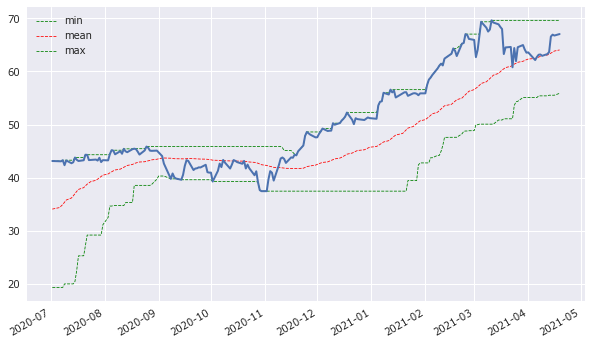

In [51]:
# Plots three rolling statistics for the final 200 data rows.
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data['close'].iloc[-200:].plot(ax=ax, lw=2.0); # Add the original time series data to the plot.

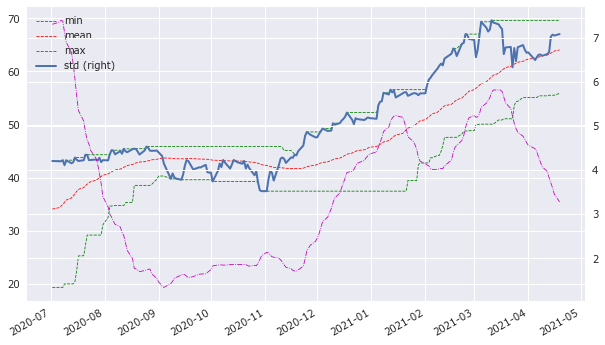

In [52]:
ax = data[['min', 'mean', 'max', 'std']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--', 'm-.'], lw=0.8, secondary_y='std')  
data['close'].iloc[-200:].plot(ax=ax, lw=2.0);  

In [53]:
# The distance is calculated for every point in time.
data['turtle_distance'] = data['close'] - data['mean'] 


In [54]:
# Define entry rules: When the closing price of the stock is greater than the high of past 55 days 
# then we go long on the stock and when the closing price of the stock is less than the low of past 55 days 
# then we go short on the stock.

# If the close price is greater than the rolling MAX go long (set 1 in the new col position) otherwise set NaN.
data['turtle_position'] = np.where(data['close'] > data['max'], 1, np.nan) 

# If the close price is lower than the rolling min go short (set -1 in the new col position) otherwise keep the column position.
data['turtle_position'] = np.where(data['close'] < data['min'], -1, data['turtle_position']) 

# If the close price cross the rolling AVG go neutral (set 0 in the new col position) otherwise keep the column position
data['turtle_position'] = np.where(data['turtle_distance'] * data['turtle_distance'].shift(1) < 0, 0, data['turtle_position']) 

# Forward fill all NaN position with the previous values; replace all remaining NaN values by 0.
data['turtle_position'] = data['turtle_position'].ffill().fillna(0)  

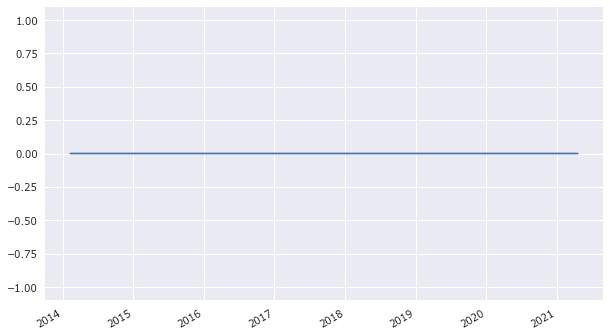

In [55]:
#Plot the resulting positionings from the index position window on
data['turtle_position'].iloc[window:].plot(ylim=[-1.1, 1.1], figsize=(10, 6));

In [56]:
ax.plot(title='Market Positioning', figsize=(10, 6), secondary_y = 'turtle_position');

In [57]:
data['turtle_strategy'] = data['turtle_position'].shift(1) * data['returns']

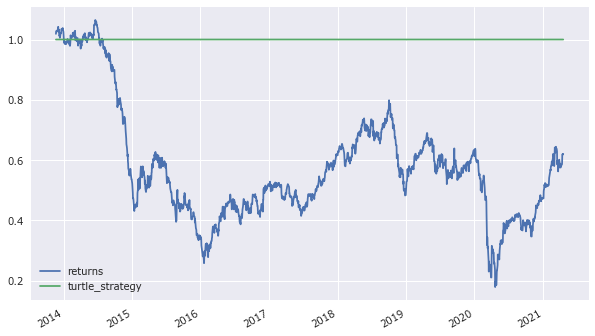

In [58]:
data[['returns', 'turtle_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [59]:
# I don't understand why it doesn't work

In [60]:
# Goal: optimizing the rolling window

# 4. Momentum strategy

##### There are two basic types of momentum strategies. The first type is cross-sectional momentum strategies. Selecting from a larger pool of instruments, these strategies buy those instruments that have recently outperformed relative to their peers (or a benchmark) and sell those instruments that have underperformed. The basic idea is that the instruments continue to outperform and underperform, respectively — at least for a certain period of time. Jegadeesh and Titman (1993, 2001) and Chan et al. (1996) study these types of trading strategies and their potential sources of profit. The second type is time series momentum strategies. These strategies buy those instruments that have recently performed well and sell those instruments that have recently performed poorly. In this case, the benchmark is the past returns of the instrument itself. Moskowitz et al. (2012) analyze this type of momentum strategy in detail across a wide range of markets. 

In [61]:
# We start keeping the same sign of the previous day return
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data['momentum_position'] = np.sign(data['returns'].rolling(3).mean()).dropna() #This time, the mean return over a rolling window of three days is taken.
data.head()

,close,SMA1,SMA2,SMA_position,returns,SMA_strategy,cumret,cummax,SMAfast-SMAslow,SMA&SD_position_5,...,min,mean,std,median,max,ewma,turtle_distance,turtle_position,turtle_strategy,momentum_position
2013-11-20,108.059998,108.34,108.03,1,NaN,NaN,NaN,NaN,0.31,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2013-11-21,110.080002,108.36,108.00,1,0.018521,0.018521,1.018693,1.018693,0.36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2013-11-22,111.050003,108.40,107.97,1,0.008773,0.008773,1.027670,1.027670,0.43,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2013-11-25,111.000000,108.43,107.94,1,-0.000450,-0.000450,1.027207,1.027670,0.49,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0,1.0
2013-11-26,110.879997,108.48,107.91,1,-0.001082,-0.001082,1.026097,1.027670,0.57,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0,1.0


In [62]:
data['momentum_strategy'] = data['momentum_position'].shift(1) * data['returns']

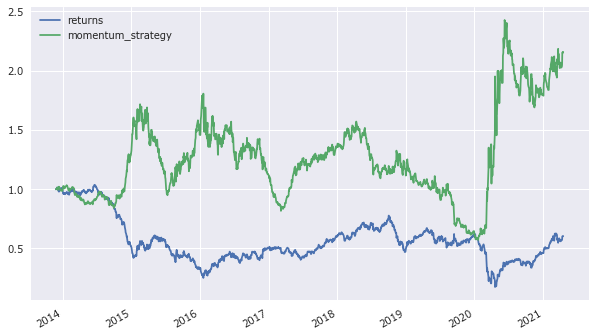

In [63]:
data[['returns', 'momentum_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [64]:
#Now we evaluate which rolling average is better performing
to_plot = ['returns']

for m in [3, 5, 7, 9, 11]:
    data['momentum_position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['momentum_strategy_%d' % m] = (data['momentum_position_%d' % m].shift(1) * data['returns'])
    to_plot.append('momentum_strategy_%d' % m) 


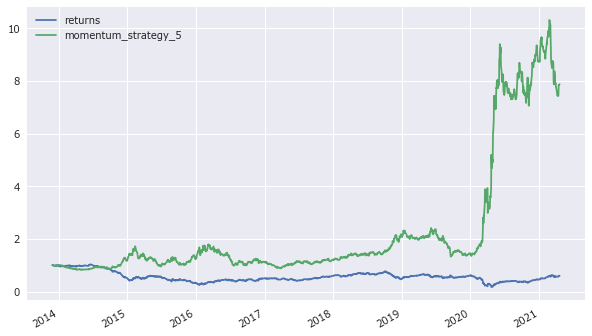

In [65]:
data[['returns', 'momentum_strategy_5']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

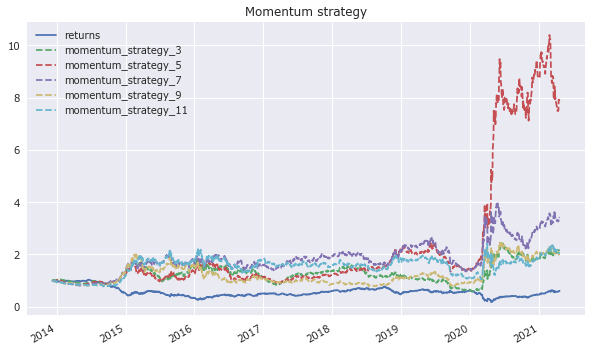

In [66]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title='Momentum strategy',figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);

In [67]:
# Let's apply the highest return with transaction cost according to the plot

In [68]:
# let's run the backtest with transaction cost at the end

import MomVectorBacktester as Mom

mombt = Mom.MomVectorBacktester(symbol, start, end, 1, 0.001)

In [69]:
mombt.run_strategy(momentum=7) # how can I set the max of the optimization?
                               # come imposto il momentum automaticamente sul max delle strategies dal plot sopra?

(2.57, 2.0)

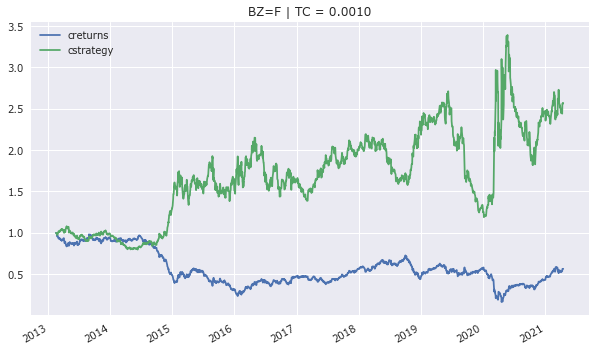

In [70]:
mombt.plot_results()

In [71]:
# Let's try the same SMA optimisation

In [72]:
%%time 
Mombt_opt = mombt.optimize_parameters((1, 20, 1))
Mombt_opt

AttributeError: 'MomVectorBacktester' object has no attribute 'optimize_parameters'

In [73]:
# I am not able to apply the same optimizer of the SMA strategy...are you?

### Brute Force Optimiser

In [74]:
%%time
r = list()
for momentum in range(1, fast):
    res = mombt.run_strategy(momentum=momentum)
    r.append((res, momentum))
r.sort()

Wall time: 439 ms


In [75]:
r[::-1][:5]

[((5.53, 4.92), 23),
 ((5.34, 4.77), 10),
 ((4.75, 4.15), 21),
 ((4.41, 3.81), 17),
 ((4.17, 3.56), 27)]

### Apply the optimization

In [76]:
# The Momentum parameter is defined by the optimizer

momentum = r[-1][1]
momentum

23

In [77]:
data['momentum_position'] = np.sign(data['returns'].rolling(momentum).mean()).dropna()

In [78]:
data['momentum_strategy'] = data['momentum_position'].shift(1) * data['returns']

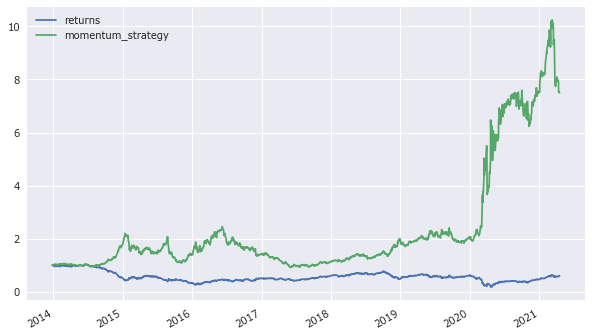

In [79]:
data[['returns','momentum_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [80]:
data['momentum_position']

2013-11-20    NaN
2013-11-21    NaN
2013-11-22    NaN
2013-11-25    NaN
2013-11-26    NaN
             ... 
2021-04-13   -1.0
2021-04-14   -1.0
2021-04-15   -1.0
2021-04-16   -1.0
2021-04-19   -1.0
Name: momentum_position, Length: 1864, dtype: float64

In [81]:
data[['momentum_strategy']].dropna().cumsum().apply(np.exp).tail()

,momentum_strategy
2021-04-13,7.898599
2021-04-14,7.553376
2021-04-15,7.512754
2021-04-16,7.531883
2021-04-19,7.500429


# 5. Mean-Reversion Strategy

#### Mean-reversion strategies rely on a reasoning that is the opposite of momentum strategies. If a financial instrument has performed “too well” relative to its trend, it is shorted, and vice versa. To put it differently, while (time series) momentum strategies assume a positive correlation between returns, mean-reversion strategies assume a negative correlation. Balvers et al. (2000) write: "Mean reversion refers to a tendency of asset prices to return to a trend path."





In [82]:
import MRVectorBacktester as MR

mrbt = MR.MRVectorBacktester(symbol, start, end, 1, 0.001)
                            
mrbt.run_strategy(SMA=fast, threshold=3)

(0.16, -0.46)

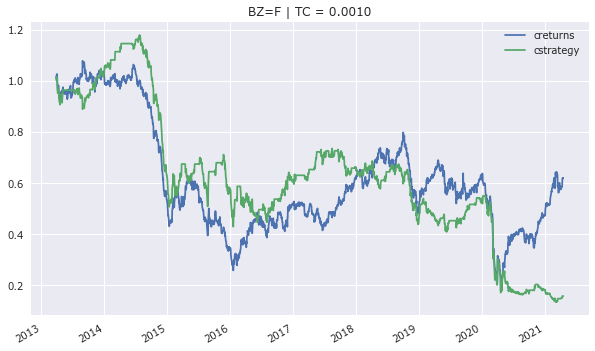

In [83]:
mrbt.plot_results()

### Brute Force Optimiser

In [84]:
%%time
r = list()
for SMA in range(1, fast):
    for threshold in np.arange(2, fast/6, 0.5):
        res = mrbt.run_strategy(SMA=SMA, threshold=threshold)
        r.append((res, SMA, threshold))
r.sort()

Wall time: 3.41 s


In [85]:
r[::-1][:5]

[((1.29, 0.73), 8, 5.5),
 ((1.22, 0.65), 4, 2.5),
 ((1.08, 0.51), 2, 5.0),
 ((1.08, 0.51), 2, 4.5),
 ((1.08, 0.51), 2, 4.0)]

### Apply the optimization

In [86]:
# The SMA parameter is defined by the optimizer

SMA = r[-1][1]
SMA

8

In [87]:
data['SMA']=data['close'].rolling(SMA).mean() # “trend path” is calculated.

In [88]:
# The threshold for the signal generation is defined.

threshold = r[-1][2]
threshold

5.5

In [89]:
data['distance'] = data['close'] - data['SMA'] # The distance is calculated for every point in time.

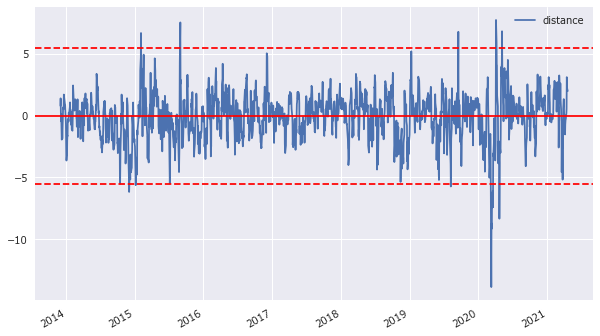

In [90]:
# The distance values are plotted

data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r', ls='--')
plt.axhline(-threshold, color='r', ls='--')
plt.axhline(0, color='r');

In [91]:
# If the distance value is greater than the threshold value go short (set -1 in the new column position) otherwise set NaN.
data['MR_position'] = np.where(data['distance'] > threshold, -1, np.nan)

In [92]:
# If the distance value is lower than the negative threshold value go long (set 1), otherwise keep the column position unchanged. 
data['MR_position'] = np.where(data['distance'] < -threshold, 1, data['MR_position'])

In [93]:
# If there is a change in the sign of the distance value go market neutral (set 0), otherwise keep the column position unchanged.
data['MR_position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['MR_position']) 

In [94]:
# Forward fill all NaN position with the previous values; replace all remaining NaN values by 0.
data['MR_position'] = data['MR_position'].ffill().fillna(0)

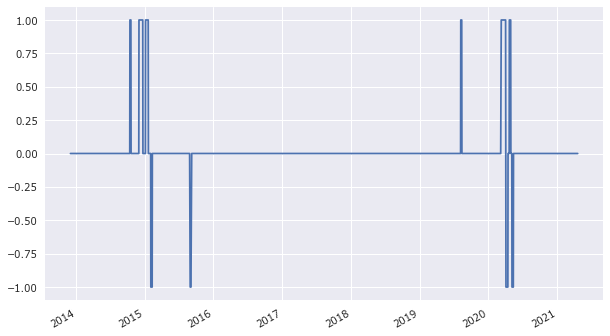

In [95]:
data['MR_position'].iloc[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6));

In [96]:
data['MR_strategy'] = data['MR_position'].shift(1) * data['returns']

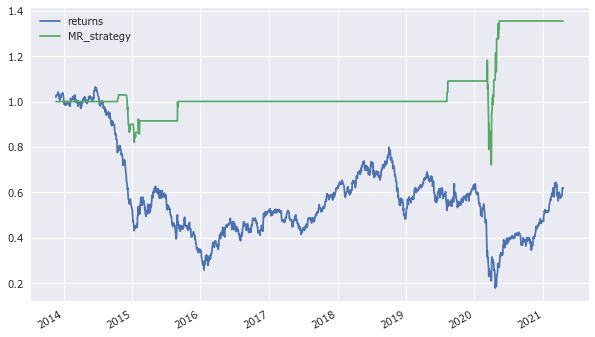

In [97]:
data[['returns', 'MR_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

# 6. Using Linear Regression for Market Movement Prediction

In [98]:
# we define how many lags we want to use for our regression
lags = 5

In [99]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['close'].shift(lag) # Takes now the price column and shifts it by lag.
    cols.append(col)
data.dropna(inplace=True)

In [100]:
data[['close','lag_1','lag_2','lag_3','lag_4','lag_5']].head()

,close,lag_1,lag_2,lag_3,lag_4,lag_5
2014-02-10,108.629997,109.570000,107.190002,106.250000,105.779999,106.040001
2014-02-11,108.680000,108.629997,109.570000,107.190002,106.250000,105.779999
2014-02-12,108.790001,108.680000,108.629997,109.570000,107.190002,106.250000
2014-02-13,108.730003,108.790001,108.680000,108.629997,109.570000,107.190002
2014-02-14,108.730003,108.730003,108.790001,108.680000,108.629997,109.570000


In [101]:
reg = np.linalg.lstsq(data[cols], data['close'], rcond=None)[0] 

In [102]:
reg

array([ 0.96328372,  0.05992318, -0.0086328 ,  0.01240134, -0.02766613])

In [103]:
# The optimal regression parameters illustrate what is typically called the random walk hypothesis. 
# This hypothesis states that stock prices or exchange rates, for example, follow a random walk 
# with the consequence that the best predictor for tomorrow’s price is today’s price. 
# The optimal parameters seem to support such a hypothesis since today’s price almost completely explains 
# the predicted price level for tomorrow (first value ogf the list). The four other values hardly have any weight assigned.

In [104]:
data['LR_prediction'] = np.dot(data[cols], reg) # Calculates the prediction values as the dot product.

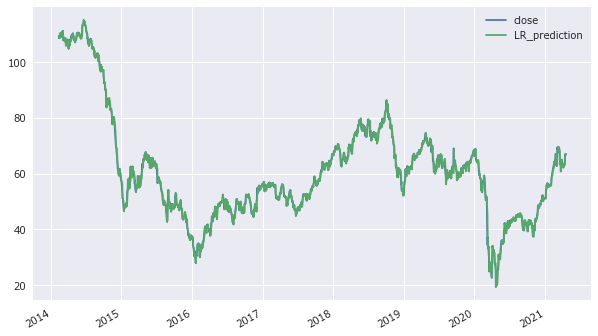

In [105]:
data[['close', 'LR_prediction']].plot(figsize=(10, 6));

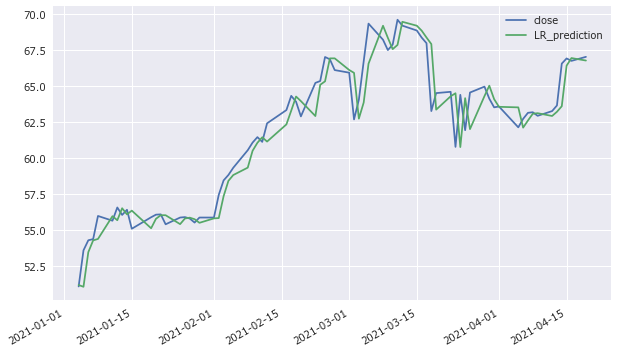

In [106]:
data[['close', 'LR_prediction']].loc['2021-1-1':yesterday].plot(figsize=(10, 6));

In [107]:
# It looks like the prediction (green) it's olly shifted by one day (compared with the blu line = Market close value)

### Predicting Future Returns

In [108]:
# Let's try predicting returns (DIRECTION) instead absolute price

In [109]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['returns'].shift(lag) # <3>
    cols.append(col)
data.dropna(inplace=True)

In [110]:
data[['returns','lag_1','lag_2','lag_3','lag_4','lag_5']].head()

,returns,lag_1,lag_2,lag_3,lag_4,lag_5
2014-02-18,0.007970,0.000000,-0.000552,0.001012,0.000460,-0.008616
2014-02-19,0.007907,0.007970,0.000000,-0.000552,0.001012,0.000460
2014-02-20,-0.001540,0.007907,0.007970,0.000000,-0.000552,0.001012
2014-02-21,-0.004088,-0.001540,0.007907,0.007970,0.000000,-0.000552
2014-02-24,0.007166,-0.004088,-0.001540,0.007907,0.007970,0.000000


In [111]:
reg = np.linalg.lstsq(data[cols], data['returns'], rcond=None)[0]

In [112]:
reg

array([0.00100529, 0.02295157, 0.00589729, 0.03296237, 0.04566146])

In [113]:
# Here we can't discover a sistematic patter as we have seen before

In [114]:
data['LR_prediction'] = np.dot(data[cols], reg)

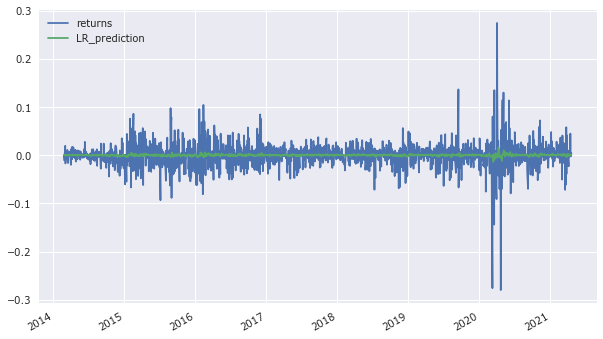

In [115]:
data[['returns', 'LR_prediction']].iloc[lags:].plot(figsize=(10, 6));

In [116]:
# We see that real returns are much much higher than what OLS regression is able to predict
# In absolute terms this is a failure

In [117]:
# Calculates the product of the market and predicted return, takes the sign of the results and counts the values.

hits = np.sign(data['returns'] * data['LR_prediction']).value_counts()
hits # Prints out the counts for the two possible values.

 1.0    928
-1.0    866
 0.0     11
dtype: int64

In [118]:
hits.values[0] / sum(hits) # Calculates the hit ratio defined as the number of correct predictions given all predictions.

0.5141274238227147

### Predicting Future Market Direction

In [119]:
# since we care about the direction, now let's train the model on the direction itself

reg = np.linalg.lstsq(data[cols], np.sign(data['returns']), rcond=None)[0] # This directly uses the sign of the return to be predicted for the regression.

In [120]:
reg

array([-1.93726801, -0.41182187,  1.4696742 ,  0.83056925,  0.9521085 ])

In [121]:
data['LR_prediction'] = np.sign(np.dot(data[cols], reg))

In [122]:
data['LR_prediction'].head(20)

2014-02-18   -1.0
2014-02-19   -1.0
2014-02-20   -1.0
2014-02-21    1.0
2014-02-24    1.0
2014-02-25   -1.0
2014-02-26    1.0
2014-02-27    1.0
2014-02-28   -1.0
2014-03-03   -1.0
2014-03-04   -1.0
2014-03-05    1.0
2014-03-06    1.0
2014-03-07   -1.0
2014-03-10   -1.0
2014-03-11   -1.0
2014-03-12   -1.0
2014-03-13    1.0
2014-03-14    1.0
2014-03-17   -1.0
Name: LR_prediction, dtype: float64

In [123]:
data['LR_prediction'].value_counts()

 1.0    904
-1.0    901
Name: LR_prediction, dtype: int64

In [124]:
hits = np.sign(data['returns'] * data['LR_prediction']).value_counts()

In [125]:
hits

 1.0    939
-1.0    855
 0.0     11
dtype: int64

In [126]:
hits.values[0] / sum(hits) # only a small improvement

0.5202216066481995

In [127]:
# The hit ratio alone does not tell too much about the economic potential of a trading strategy using linear regression 
# in the way presented so far. It is well known that the ten best and worst days in the markets for a given period 
# of time considerably influence the overall performance of investments.

### Vectorized Backtesting of Linear Regression-based Strategy 

In [128]:
# Multiplies the prediction values (positionings) by the market returns.

data['LR_strategy'] = data['LR_prediction'] * data['returns'] 

In [129]:
# Calculates the gross performance of the base instrument and the strategy.

data[['returns', 'LR_strategy']].sum().apply(np.exp) 

returns        0.616665
LR_strategy    1.973906
dtype: float64

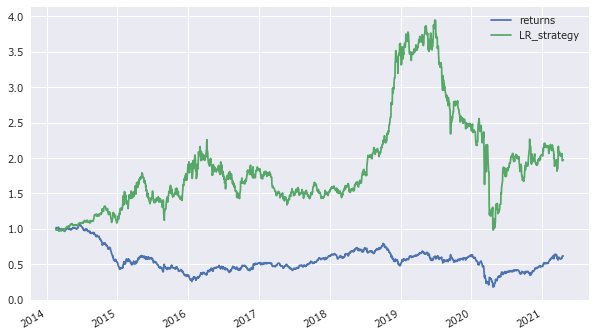

In [130]:
# Plots the gross performance of the base instrument and the strategy over time (in-sample, no transaction costs).

data[['returns', 'LR_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6)); 

### Generalizing the approach and considering transaction costs

In [131]:
import LRVectorBacktester as LR # Imports the module as LR.

In [132]:
# Instantiates an object of the LRVectorBacktester class.

lrbt = LR.LRVectorBacktester(symbol, start, end, 1, 0.0) 

In [133]:
# Trains and evaluates the strategy on the same data set.

lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=5)

(1.45, 0.87)

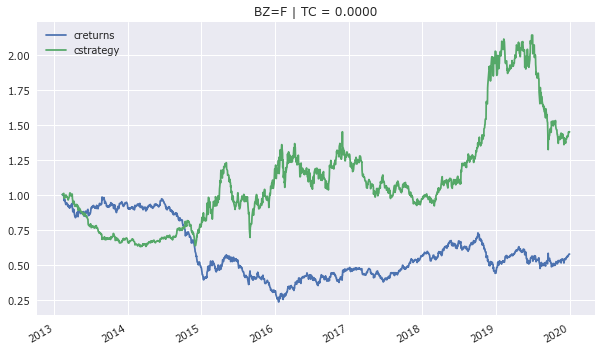

In [134]:
lrbt.plot_results()

In [135]:
# Uses two different data sets for the training and evaluation steps.

lrbt.run_strategy('2010-1-1', '2017-12-31',
                  '2018-1-1', '2019-12-31', lags=5)

(1.46, 0.45)

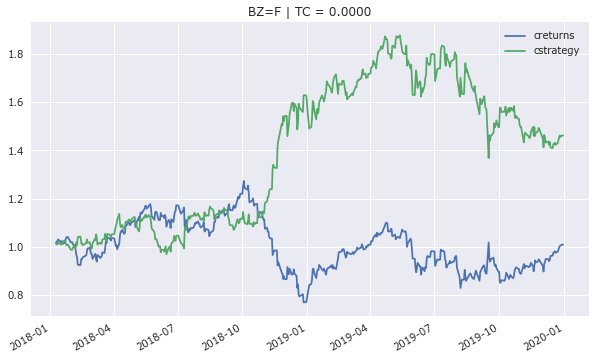

In [136]:
lrbt.plot_results() 

In [137]:
# splitting in train and test the result is the above

In [138]:
# Let's now consider transaction costs and 7 lags

In [139]:
lrbt = LR.LRVectorBacktester(symbol, start, end, 1, 0.002) 
lrbt.run_strategy('2010-1-1', '2019-12-31',
                  '2010-1-1', '2019-12-31', lags=7)

(0.37, -0.21)

In [140]:
lrbt.run_strategy('2010-1-1', '2014-12-31',
                  '2015-1-1', '2019-12-31', lags=7)

(0.3, -1.15)

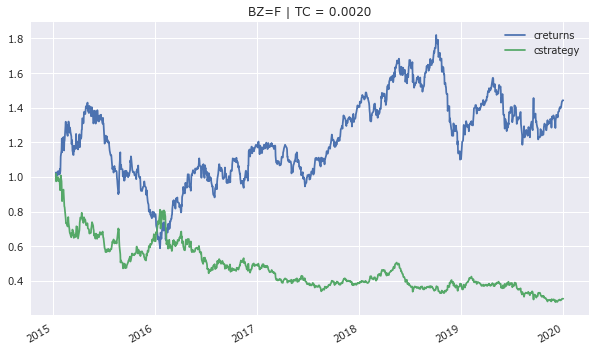

In [141]:
lrbt.plot_results()

# 7. Logistic Regressione & Machine Learning to Predict Market Direction

In [142]:
lags = 5

In [143]:
cols = []                                     # Instantiates an empty list object to collect column names.
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)                # Creates a str object for the column name.
    data[col] = data['returns'].shift(lag)    # Adds a new column to the DataFrame object with the respective lag data.
    cols.append(col)                          # Appends the column name to the list object.

In [144]:
data.dropna(inplace=True)                     # Makes sure that the data set is complete.

In [145]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [146]:
# Instantiates the model object using a C value that gives less weight to the regularization term

lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs', multi_class='auto', max_iter=1000)

In [147]:
lm.fit(data[cols], np.sign(data['returns']))  # Fits the model based on the sign of the returns to be predicted.

LogisticRegression(C=10000000.0, max_iter=1000)

In [148]:
# Generates a new column in the DataFrame object and writes the prediction values to it.

data['LogReg_prediction'] = lm.predict(data[cols]) 

In [149]:
data['LogReg_prediction'].value_counts()      # Shows the number of the resulting long and short positions, respectively.

 1.0    949
-1.0    851
Name: LogReg_prediction, dtype: int64

In [150]:
# Calculates the number of correct and wrong predictions.

hits = np.sign(data['returns'].iloc[lags:] * data['LogReg_prediction'].iloc[lags:]).value_counts()

In [151]:
hits

 1.0    940
-1.0    844
 0.0     11
dtype: int64

In [152]:
accuracy_score(data['LogReg_prediction'],
               np.sign(data['returns']))      # Hit Ratio

0.5233333333333333

In [153]:
# Gross performance of the strategy

data['LogReg_strategy'] = data['LogReg_prediction'] * data['returns']

In [154]:
data[['returns', 'LogReg_strategy']].sum().apply(np.exp)

returns            0.606020
LogReg_strategy    1.759741
dtype: float64

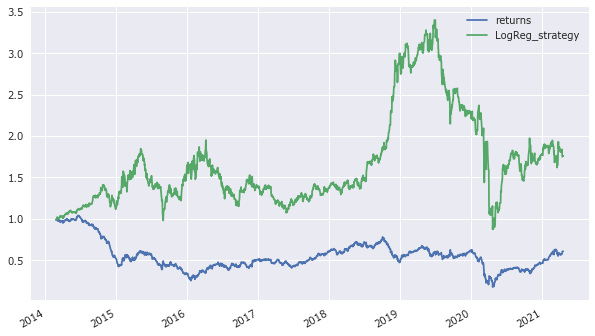

In [155]:
data[['returns', 'LogReg_strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [156]:
# Let's play with the lags

### Logistic Regression on price (not for use, only example)

In [157]:
lags = 5

In [158]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data[col] = data['close'].shift(lag)
    cols.append(col)

In [159]:
data.dropna(inplace=True)

In [160]:
lm.fit(data[cols], np.sign(data['returns']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [161]:
data['LogRegonPrice_prediction'] = lm.predict(data[cols])

In [162]:
data['LogRegonPrice_prediction'].value_counts()

 1.0    974
-1.0    821
Name: LogRegonPrice_prediction, dtype: int64

In [163]:
hits = np.sign(data['returns'].iloc[lags:] * data['LogRegonPrice_prediction'].iloc[lags:]).value_counts()

In [164]:
hits

 1.0    900
-1.0    879
 0.0     11
dtype: int64

In [165]:
accuracy_score(data['LogRegonPrice_prediction'],
               np.sign(data['returns']))

0.5036211699164346

In [166]:
data['LogRegonPrice_strategy'] = data['LogRegonPrice_prediction'] * data['returns']

In [167]:
data[['returns', 'LogRegonPrice_strategy']].sum().apply(np.exp)

returns                   0.602968
LogRegonPrice_strategy    0.446460
dtype: float64

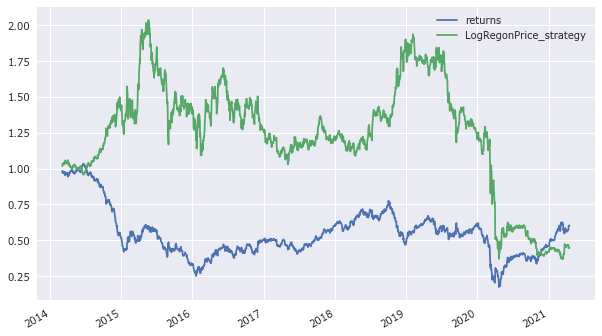

In [168]:
data[['returns', 'LogRegonPrice_strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

### Generalizing the Approach

In [169]:
import ScikitVectorBacktester as SCI

In [170]:
scibt = SCI.ScikitVectorBacktester(symbol, '2010-1-1', '2019-12-31', 1, 0.002, 'logistic')

In [171]:
scibt.run_strategy('2015-1-1', '2019-12-31',
                   '2015-1-1', '2019-12-31', lags=10) # in-sample

(0.54, -0.9)

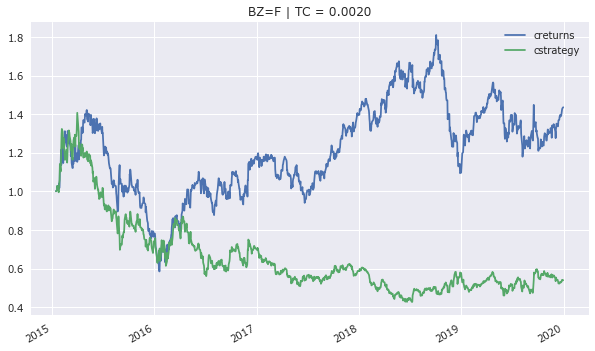

In [172]:
scibt.plot_results()

In [173]:
scibt.run_strategy('2013-1-1', '2017-12-31',
                   '2018-1-1', '2018-12-31', lags=10)

(0.93, 0.18)

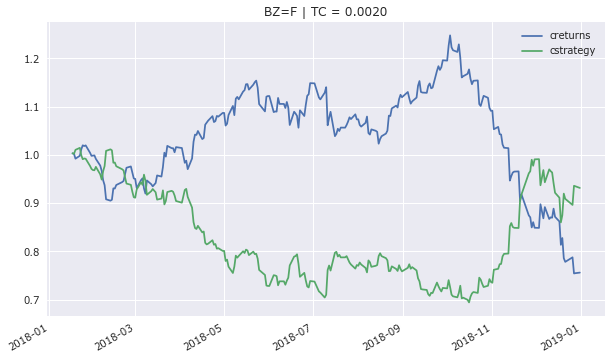

In [174]:
scibt.plot_results()

In [175]:
# changing the out-of-sample training and test period can change a lot the return of the strategy (in addition of the transaction costs of course).
# How do I set the out-of-sample dates in order the have more reliability?

# 8. Deep Learning for Market Movement Prediction

In [176]:
data['direction'] = np.where(data['returns'] > 0, 1, 0) # Defines the direction as a binary column.

In [177]:
lags = 5

In [178]:
cols = []
for lag in range(1, lags + 1): # Creates the lagged data.
    col = f'lag_{lag}'
    data[col] = data['returns'].shift(lag) # Creates new DataFrame columns with the log returns shifted by the respective number of lags.
    cols.append(col)
data.dropna(inplace=True) # Deletes rows containing NaN values.

In [179]:
data.round(4).tail() # Prints out the final five rows indicating the “patterns” emerging in the five feature columns.

,close,SMA1,SMA2,SMA_position,returns,SMA_strategy,cumret,cummax,SMAfast-SMAslow,SMA&SD_position_5,...,lag_3,lag_4,lag_5,LR_prediction,LR_strategy,LogReg_prediction,LogReg_strategy,LogRegonPrice_prediction,LogRegonPrice_strategy,direction
2021-04-13,63.67,65.24,50.04,1,0.0061,0.0061,2.6088,3.3395,15.20,1,...,0.0006,0.0067,0.0094,1.0,0.0061,1.0,0.0061,-1.0,-0.0061,1
2021-04-14,66.58,65.23,50.15,1,0.0447,0.0447,2.7280,3.3395,15.08,1,...,-0.0040,0.0006,0.0067,-1.0,-0.0447,-1.0,-0.0447,-1.0,-0.0447,1
2021-04-15,66.94,65.23,50.27,1,0.0054,0.0054,2.7428,3.3395,14.96,1,...,0.0052,-0.0040,0.0006,-1.0,-0.0054,-1.0,-0.0054,-1.0,-0.0054,1
2021-04-16,66.77,65.25,50.40,1,-0.0025,-0.0025,2.7358,3.3395,14.85,1,...,0.0061,0.0052,-0.0040,-1.0,0.0025,-1.0,0.0025,-1.0,0.0025,0
2021-04-19,67.05,65.28,50.53,1,0.0042,0.0042,2.7473,3.3395,14.75,1,...,0.0447,0.0061,0.0052,1.0,0.0042,1.0,0.0042,1.0,0.0042,1


In [180]:
import tensorflow as tf
from keras.models import Sequential   # Imports the required model object
from keras.layers import Dense        # Imports the relevant layer
from keras.optimizers import Adam     

import random

In [181]:
optimizer = Adam(learning_rate=0.0001)

In [182]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [183]:
set_seeds()
model = Sequential()                                           # A Sequential model is instantiated.
model.add(Dense(64, activation='relu', input_shape=(lags,)))   # The hidden layers and the output layer are defined.
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # <5>
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # Compiles the Sequential model object for classification.

In [184]:
cutoff = '2018-12-31'  # Defines the cutoff date between the training and test data.
                       # come faccio a renderlo compatibile con 'end_cutoff'?
                       # NB: da cabiare con TTF => posticipare almeno 1 anno

In [185]:
training_data = data[data.index < cutoff].copy()    # Defines the training and test data sets

In [186]:
mu, std = training_data.mean(), training_data.std() # Normalizes the features data by Gaussian normalization.

In [187]:
training_data_ = (training_data - mu) / std  # normalize

In [188]:
test_data = data[data.index >= cutoff].copy() 

In [189]:
test_data_ = (test_data - mu) / std  # we need to use the training statistics to be used for the normalization of the test data

In [190]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False) # Fits the model to the training data set.

Wall time: 5.12 s


In [191]:
res = pd.DataFrame(model.history.history)

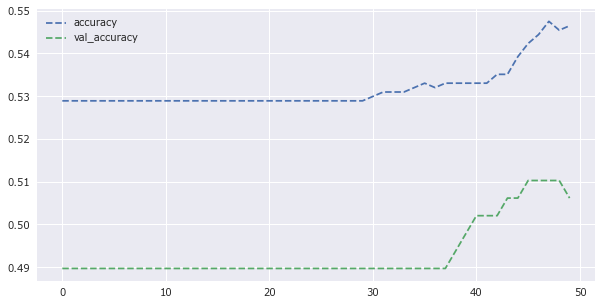

In [192]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 5), style='--'); # they shold converge, but they don't: why?????

In [193]:
model.evaluate(training_data_[cols], training_data['direction'])

38/38 [==============================] - 0s 535us/step - loss: 0.7560 - accuracy: 0.5425


[0.7560312151908875, 0.5425268411636353]

In [194]:
# pred = model.predict_classes(training_data_[cols]) # deprecated version
pred = (model.predict(training_data_[cols])>0.5).astype("int32") # Predicts the market direction in-sample.

In [195]:
pred[:30].flatten() 

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0])

In [196]:
training_data['DpLrn_prediction'] = np.where(pred > 0, 1, -1) # Transforms the predictions into long-short positions, +1 and -1.

In [197]:
training_data['DpLrn_strategy'] = (training_data['DpLrn_prediction'] * training_data['returns']) # Calculates the strategy returns given the positions.

In [198]:
training_data[['returns', 'DpLrn_strategy']].sum().apply(np.exp)

returns           0.482976
DpLrn_strategy    6.177153
dtype: float64

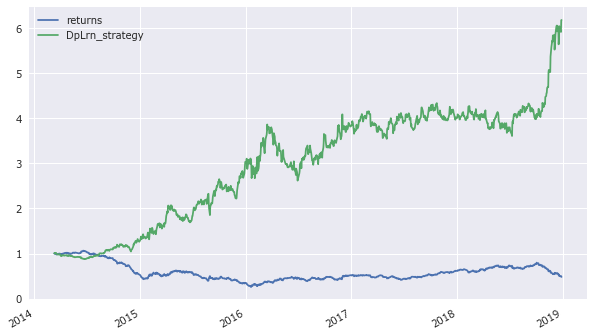

In [199]:
training_data[['returns', 'DpLrn_strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6)); # Plots and compares the strategy performance to the benchmark performance (in-sample).


In [200]:
model.evaluate(test_data_[cols], test_data['direction'])

19/19 [==============================] - 0s 658us/step - loss: 0.9440 - accuracy: 0.4767


[0.9439915418624878, 0.47668394446372986]

In [201]:
pred = (model.predict(test_data_[cols])>0.5).astype("int32") # Let's evaluate how the strategy performs on the test data set (out-of-sample)

In [202]:
test_data['DpLrn_prediction'] = np.where(pred > 0, 1, -1)

In [203]:
test_data['DpLrn_prediction'].value_counts() # Why are all negative hits?

-1    350
 1    229
Name: DpLrn_prediction, dtype: int64

In [204]:
test_data['DpLrn_strategy'] = (test_data['DpLrn_prediction'] * test_data['returns'])

In [205]:
test_data[['returns', 'DpLrn_strategy']].sum().apply(np.exp)

returns           1.284483
DpLrn_strategy    0.334270
dtype: float64

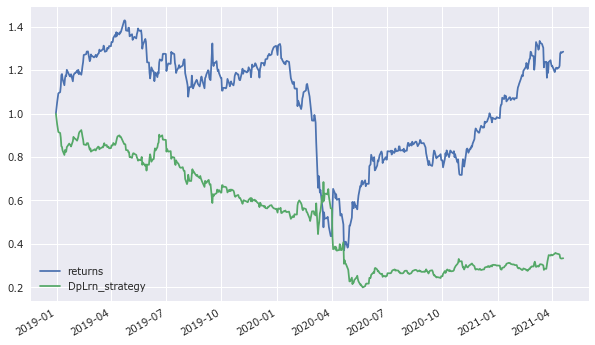

In [206]:
test_data[['returns', 'DpLrn_strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6)); #on the test data we lose A LOT

### Adding Different Types of Features

In [207]:
data['momentum'] = data['returns'].rolling(5).mean().shift(1)                   # The momentum-based feature.

In [208]:
data['volatility'] = data['returns'].rolling(20).std().shift(1)                 # The volatility-based feature.

In [209]:
data['distance'] = (data['close'] - data['close'].rolling(50).mean()).shift(1)  # The distance-based feature.

In [210]:
data.dropna(inplace=True)

In [211]:
cols.extend(['momentum', 'volatility', 'distance'])

In [212]:
print(data.round(4).tail())

            close   SMA1   SMA2  SMA_position  returns  SMA_strategy  cumret  \
2021-04-13  63.67  65.24  50.04             1   0.0061        0.0061  2.6088   
2021-04-14  66.58  65.23  50.15             1   0.0447        0.0447  2.7280   
2021-04-15  66.94  65.23  50.27             1   0.0054        0.0054  2.7428   
2021-04-16  66.77  65.25  50.40             1  -0.0025       -0.0025  2.7358   
2021-04-19  67.05  65.28  50.53             1   0.0042        0.0042  2.7473   

            cummax  SMAfast-SMAslow  SMA&SD_position_5  ...   lag_5  \
2021-04-13  3.3395            15.20                  1  ...  0.0094   
2021-04-14  3.3395            15.08                  1  ...  0.0067   
2021-04-15  3.3395            14.96                  1  ...  0.0006   
2021-04-16  3.3395            14.85                  1  ... -0.0040   
2021-04-19  3.3395            14.75                  1  ...  0.0052   

            LR_prediction  LR_strategy  LogReg_prediction  LogReg_strategy  \
2021-04-13    

In [213]:
training_data = data[data.index < cutoff].copy()

In [214]:
mu, std = training_data.mean(), training_data.std()

In [215]:
training_data_ = (training_data - mu) / std

In [216]:
test_data = data[data.index >= cutoff].copy() 

In [217]:
test_data_ = (test_data - mu) / std

In [218]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [219]:
%%time 
model.fit(training_data_[cols], training_data['direction'],
          verbose=False, epochs=25)

Wall time: 928 ms


In [220]:
model.evaluate(training_data_[cols], training_data['direction'])

37/37 [==============================] - 0s 562us/step - loss: 0.6712 - accuracy: 0.5840


[0.6712296009063721, 0.5839793086051941]

In [221]:
pred = (model.predict(training_data_[cols])>0.5).astype("int32")

In [222]:
training_data['DpLrn_prediction'] = np.where(pred > 0, 1, -1)

In [223]:
training_data['DpLrn_strategy'] = training_data['DpLrn_prediction'] * \
                            training_data['returns']

In [224]:
training_data[['returns', 'DpLrn_strategy']].sum().apply(np.exp)

returns            0.475887
DpLrn_strategy    38.542091
dtype: float64

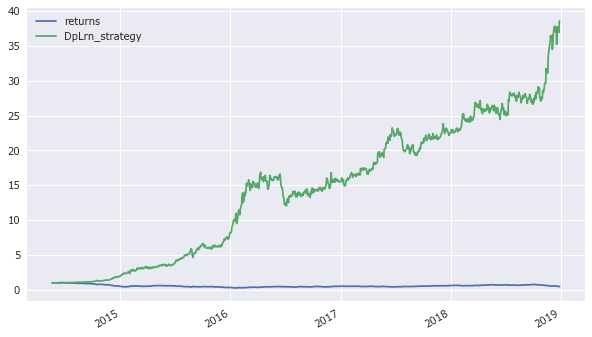

In [225]:
training_data[['returns', 'DpLrn_strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [226]:
model.evaluate(test_data_[cols], test_data['direction'])

19/19 [==============================] - 0s 660us/step - loss: 0.7309 - accuracy: 0.4801


[0.7308510541915894, 0.4801381826400757]

In [227]:
pred = (model.predict(test_data_[cols])>0.5).astype("int32")

In [228]:
test_data['DpLrn_prediction'] = np.where(pred > 0, 1, -1)

In [229]:
test_data['DpLrn_prediction'].value_counts()

-1    380
 1    199
Name: DpLrn_prediction, dtype: int64

In [230]:
test_data['DpLrn_strategy'] = (test_data['DpLrn_prediction'] *
                        test_data['returns'])

In [231]:
test_data[['returns', 'DpLrn_strategy']].sum().apply(np.exp)

returns           1.284483
DpLrn_strategy    1.211631
dtype: float64

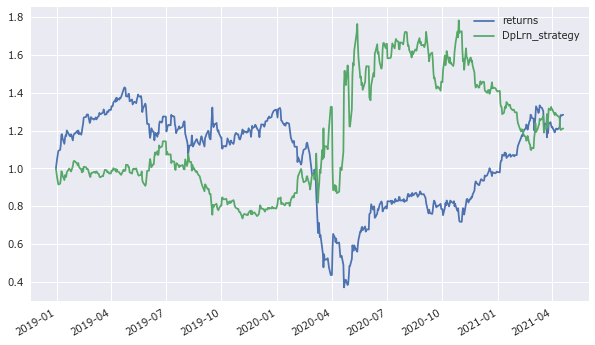

In [232]:
test_data[['returns', 'DpLrn_strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [233]:
# changing the cutoff date, the same strategy can go from positive returns to negative returns and viceversa.
# How do you usually manage this variable ?

# Resume

In [234]:
data[['SMA_strategy', 'momentum_strategy','MR_strategy', 'LR_strategy']].dropna().cumsum().apply(np.exp).tail()

,SMA_strategy,momentum_strategy,MR_strategy,LR_strategy
2021-04-13,2.854262,7.940007,1.354877,1.967882
2021-04-14,2.984715,7.592974,1.354877,1.881872
2021-04-15,3.000853,7.552139,1.354877,1.871751
2021-04-16,2.993232,7.571368,1.354877,1.876517
2021-04-19,3.005784,7.539750,1.354877,1.884387


In [235]:
training_data['DpLrn_strategy'].dropna().cumsum().apply(np.exp).tail()

2018-12-21    37.381962
2018-12-24    37.157580
2018-12-26    36.935875
2018-12-27    38.571648
2018-12-28    38.542091
Name: DpLrn_strategy, dtype: float64

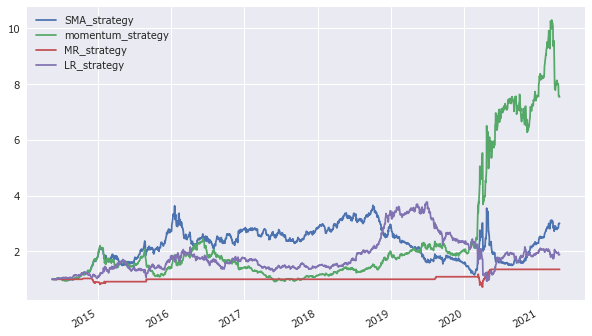

In [236]:
data[['SMA_strategy', 'momentum_strategy','MR_strategy', 'LR_strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

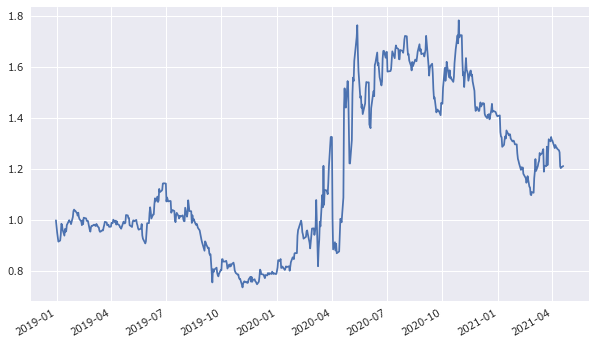

In [237]:
test_data['DpLrn_strategy'].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [238]:
data[['SMA_position', 'momentum_position','MR_position', 'LR_prediction' ]].dropna().tail()

,SMA_position,momentum_position,MR_position,LR_prediction
2021-04-13,1,-1.0,0.0,1.0
2021-04-14,1,-1.0,0.0,-1.0
2021-04-15,1,-1.0,0.0,-1.0
2021-04-16,1,-1.0,0.0,-1.0
2021-04-19,1,-1.0,0.0,1.0


In [239]:
test_data['DpLrn_prediction'].tail()

2021-04-13   -1
2021-04-14   -1
2021-04-15   -1
2021-04-16   -1
2021-04-19    1
Name: DpLrn_prediction, dtype: int32

In [240]:
# How can I put together all the signal weighting for the strategy returns?
# Is there a way to combine the 2 most successfull strategies in order to get a stronger signal?